In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [12]:
evaluation_data = pd.read_csv('./results/results_03_04_2024_00_56_38.csv')

# Results Analysis

In [13]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [14]:
print(len(evaluation_data))
evaluation_data.tail(10)

1800


,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time(s),LastTokenQuery,EquivalenceQuery,Tree Depth,Inner Nodes,Accuracy_in_target,Accuracy_anywhere,IsEquivalentExact,IsEquivalentOmitZero,IsMinimal
1790,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_300_5,287,287,1,5.300706,3063,77,3,3,1.0,1.0,True,True,True
1791,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_300_5,287,287,2,5.024056,3063,77,3,3,1.0,1.0,True,True,True
1792,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_300_5,287,287,3,5.301090,3063,77,3,3,1.0,1.0,True,True,True
1793,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_300_5,287,287,4,5.092409,3063,77,3,3,1.0,1.0,True,True,True
1794,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_300_5,287,287,5,5.238546,3063,77,3,3,1.0,1.0,True,True,True
1795,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_300_5,287,287,6,5.114281,3063,77,3,3,1.0,1.0,True,True,True
1796,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_300_5,287,287,7,5.236983,3063,77,3,3,1.0,1.0,True,True,True
1797,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_300_5,287,287,8,5.346205,3063,77,3,3,1.0,1.0,True,True,True
1798,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_300_5,287,287,9,5.051447,3063,77,3,3,1.0,1.0,True,True,True
1799,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_300_5,287,287,10,5.055683,3063,77,3,3,1.0,1.0,True,True,True


In [15]:
def nearest_value(x, values):
    return min(values, key=lambda y: abs(y - x))

evaluation_data['Nominal_Size'] = evaluation_data['Number of States'].apply(lambda x: nearest_value(x, [100,200,300] ))

In [16]:
import math

evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']

In [17]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

cols_to_agg = ['Time(s)', 'LastTokenQuery', 'EquivalenceQuery', 'Extracted Number of States', 'Accuracy_in_target', 'Accuracy_anywhere', 'TREE_SIZE']
funcs =  ['median', IQR]  
names = ['median', 'IQR']  
grouped_multiple = evaluation_data.groupby(['Algorithm', 'Nominal_Size']).agg({x:funcs for x in cols_to_agg})
col_names = [x+"_"+fun_name for x in cols_to_agg for fun_name in names]
grouped_multiple.columns = col_names
#grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
#'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR',]
grouped_multiple.reset_index(inplace = True)

In [18]:
evaluation_data.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time(s)', 'LastTokenQuery',
       'EquivalenceQuery', 'Tree Depth', 'Inner Nodes', 'Accuracy_in_target',
       'Accuracy_anywhere', 'IsEquivalentExact', 'IsEquivalentOmitZero',
       'IsMinimal', 'Nominal_Size', 'TREE_SIZE'],
      dtype='object')

In [19]:
len(grouped_multiple)

18

In [20]:
evaluation_data_exact = evaluation_data[evaluation_data["Algorithm"].apply(lambda x: 'exact' in str(x))]
evaluation_data_sampling =  evaluation_data[evaluation_data["Algorithm"].apply(lambda x: 'exact' not in str(x))]

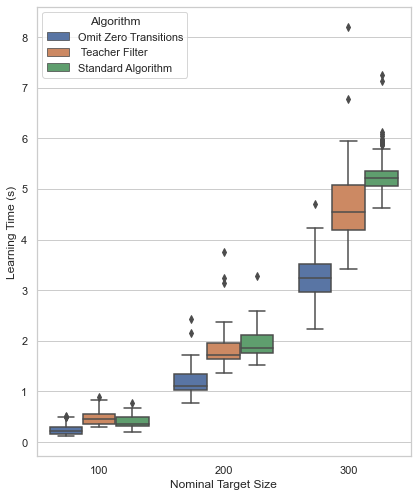

In [21]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.boxplot(x="Nominal_Size", y="Time(s)", hue="Algorithm",
                 data=evaluation_data_exact)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Nominal Target Size", fontsize = 12)
ax.set_ylabel("Learning Time (s)", fontsize = 12)
new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(ax.get_legend().get_texts(), new_labels):
    t.set_text(l)

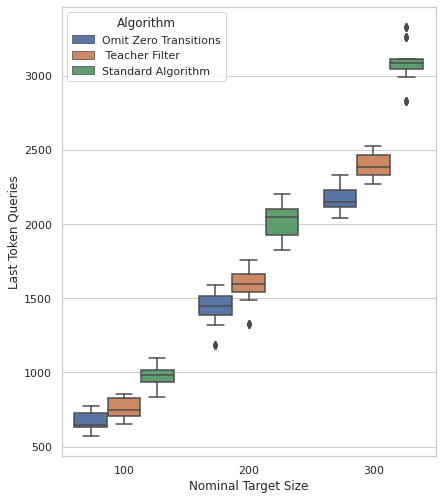

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.boxplot(x="Nominal_Size", y="LastTokenQuery", hue="Algorithm",
                 data=evaluation_data_exact)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Nominal Target Size", fontsize = 12)
ax.set_ylabel("Last Token Queries", fontsize = 12)
new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(ax.get_legend().get_texts(), new_labels):
    t.set_text(l)

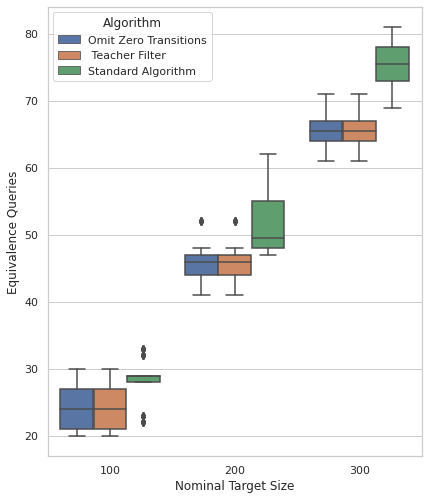

In [19]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.boxplot(x="Nominal_Size", y="EquivalenceQuery", hue="Algorithm",
                 data=evaluation_data_exact)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Nominal Target Size", fontsize = 12)
ax.set_ylabel("Equivalence Queries", fontsize = 12)
new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(ax.get_legend().get_texts(), new_labels):
    t.set_text(l)

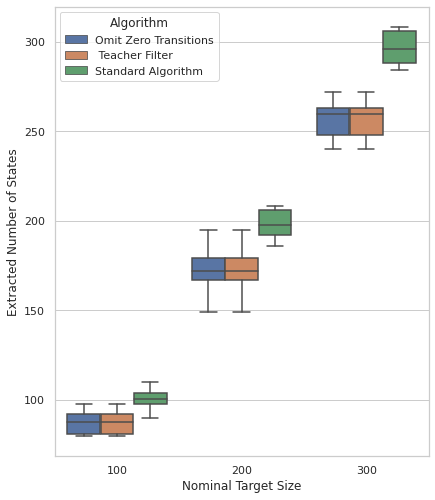

In [20]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.boxplot(x="Nominal_Size", y="Extracted Number of States", hue="Algorithm",
                 data=evaluation_data_exact)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Nominal Target Size", fontsize = 12)
ax.set_ylabel("Extracted Number of States", fontsize = 12)
new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(ax.get_legend().get_texts(), new_labels):
    t.set_text(l)

In [21]:
evaluation_data_exact["IsEquivalentOmitZero"].value_counts()

True    900
Name: IsEquivalentOmitZero, dtype: int64

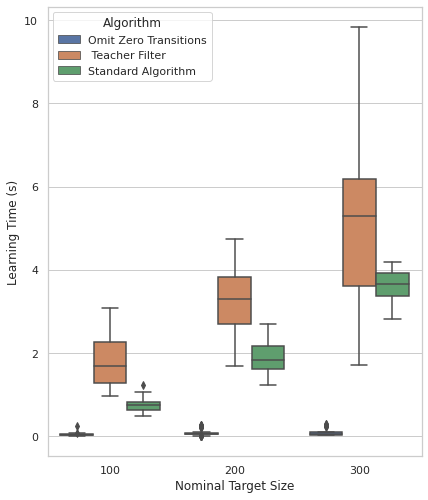

In [23]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.boxplot(x="Nominal_Size", y="Time(s)", hue="Algorithm",
                 data=evaluation_data_sampling)

ax.set_xlabel("Nominal Target Size", fontsize = 12)
ax.set_ylabel("Learning Time (s)", fontsize = 12)
new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(ax.get_legend().get_texts(), new_labels):
    t.set_text(l)

In [13]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
pivot = int(len(grouped_multiple)/5)

zero = np.array(grouped_multiple["Time(s)_median"][0:pivot])
standard = np.array(grouped_multiple["Time(s)_median"][pivot:2*pivot])
teacher_filter = np.array(grouped_multiple["Time(s)_median"][2*pivot:])

speedup_filter_vs_zero = teacher_filter/zero
speedup_standard_vs_zero = standard / zero

sns.set_style("whitegrid")
ax = sns.regplot(x=grouped_multiple['Number of States'][0:pivot], y=speedup_filter_vs_zero, order=1, ci=None, label="Teacher Filter vs Omit Zero")
ax = sns.regplot(x=grouped_multiple['Number of States'][0:pivot], y=speedup_standard_vs_zero, order=1, ci=None, label="Standard Teacher vs Omit Zero")
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Speedup", fontsize = 12)
ax.legend()

ValueError: operands could not be broadcast together with shapes (78,) (26,) 

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(4.631875000000001, 0.5, 'Accuracy in target median')

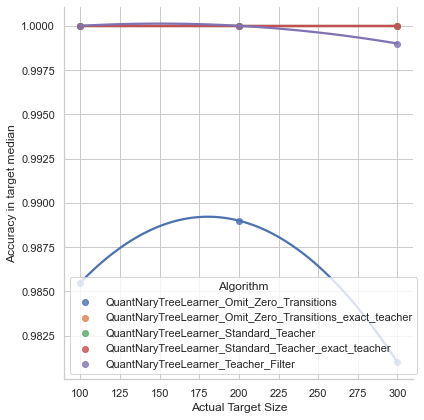

In [24]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="Accuracy_in_target_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, order = 2, ci=None, size = 6)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.axes[0,0].set_xlabel("Actual Target Size", fontsize = 12)
ax.axes[0,0].set_ylabel("Accuracy in target median", fontsize = 12)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(22.96, 0.5, 'Accuracy anywhere median')

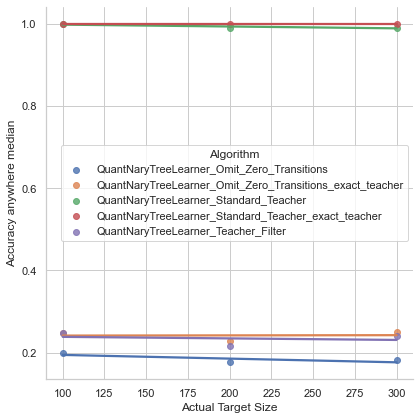

In [26]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="Accuracy_anywhere_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, order = 1, ci=None, size = 6)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.axes[0,0].set_xlabel("Actual Target Size", fontsize = 12)
ax.axes[0,0].set_ylabel("Accuracy anywhere median", fontsize = 12)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


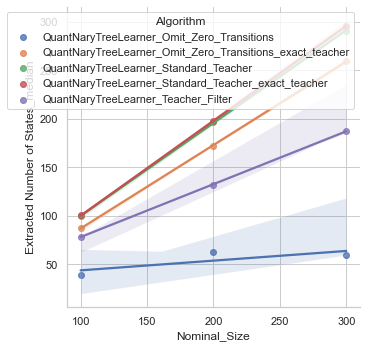

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="Extracted Number of States_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


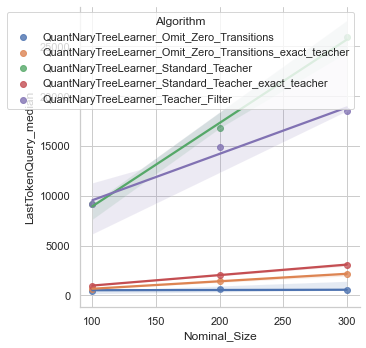

In [28]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="LastTokenQuery_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(19.96, 0.5, 'Tree Size Median')

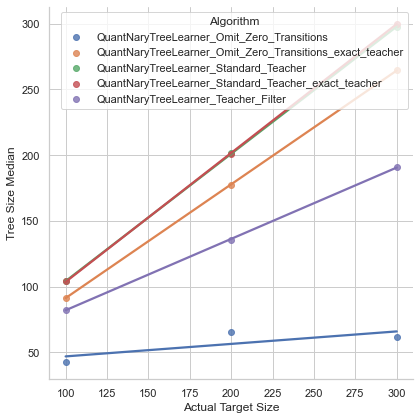

In [30]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="TREE_SIZE_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, ci = None, size = 6)
ax.axes[0,0].set_xlabel("Actual Target Size", fontsize = 12)
ax.axes[0,0].set_ylabel("Tree Size Median", fontsize = 12)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)